In [ ]:

import kagglehub
energy_consumption_prediction_path = kagglehub.dataset_download('ajinilpatel/energy-consumption-prediction')

print('Data source import complete.')


Data source import complete.


# Research Project: Predicting Energy Consumption in Residential Buildings

In [ ]:


import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)



import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



/kaggle/input/energy-consumption-prediction/Energy_consumption_dataset.csv


# **Import**

In [ ]:
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import datetime

from plotly.subplots import make_subplots
import plotly.graph_objects as go

import warnings
warnings.filterwarnings("ignore")

# **1. Data Import & EDA**

In [ ]:
df = pd.read_csv('/kaggle/input/energy-consumption-prediction/Energy_consumption_dataset.csv')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Data Description**   
* Month : Represents the month of the year (1–12). Useful for categorizing month data into seasons.

* Hour : Hourly readings of the day (0–23), useful for categorizing time data into morning, afternoon, evening, and night.

* DayOfWeek : Categorical variable indicating the day of the week

* Holiday : Boolean categorical variable indicating whether the day is a holiday.

* Temperature : Numerical variable representing the temperature in degrees Celsius.

* Humidity : Numerical variable showing the humidity level as a percentage.

* SquareFootage : Numerical variable measuring the area of the building or space.

* Occupancy : Numerical variable representing the number of people in the area.

* HVACUsage : Categorical variable indicating the usage of Heating, Ventilation, and Air Conditioning systems.

* LightingUsage : Categorical variable indicating the usage of lighting systems.

* RenewableEnergy : Numerical variable representing the percentage contribution of renewable energy sources.

* EnergyConsumption :Numerical target variable representing the total energy consumed.

In [ ]:
df

,Month,Hour,DayOfWeek,Holiday,Temperature,Humidity,SquareFootage,Occupancy,HVACUsage,LightingUsage,RenewableEnergy,EnergyConsumption
0,1,0,Saturday,No,25.139433,43.431581,1565.693999,5,On,Off,2.774699,75.364373
1,1,1,Saturday,No,27.731651,54.225919,1411.064918,1,On,On,21.831384,83.401855
2,1,2,Saturday,No,28.704277,58.907658,1755.715009,2,Off,Off,6.764672,78.270888
3,1,3,Saturday,No,20.080469,50.371637,1452.316318,1,Off,On,8.623447,56.519850
4,1,4,Saturday,No,23.097359,51.401421,1094.130359,9,On,Off,3.071969,70.811732
...,...,...,...,...,...,...,...,...,...,...,...,...
4995,12,6,Sunday,Yes,26.338718,52.580000,1563.567259,7,On,On,20.591717,70.270344
4996,12,17,Monday,No,20.007565,42.765607,1999.982252,5,Off,On,7.536319,73.943071
4997,12,13,Thursday,Yes,26.226253,30.015975,1999.982252,5,Off,On,28.162193,85.784613
4998,12,8,Saturday,Yes,24.673206,50.223939,1240.811298,2,On,On,20.918483,63.784001


# Understand the Dataset

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Month              5000 non-null   int64  
 1   Hour               5000 non-null   int64  
 2   DayOfWeek          5000 non-null   object 
 3   Holiday            5000 non-null   object 
 4   Temperature        5000 non-null   float64
 5   Humidity           5000 non-null   float64
 6   SquareFootage      5000 non-null   float64
 7   Occupancy          5000 non-null   int64  
 8   HVACUsage          5000 non-null   object 
 9   LightingUsage      5000 non-null   object 
 10  RenewableEnergy    5000 non-null   float64
 11  EnergyConsumption  5000 non-null   float64
dtypes: float64(5), int64(3), object(4)
memory usage: 468.9+ KB


# Research Objective
To develop and evaluate machine learning models for predicting **energy consumption** in residential buildings based on environmental conditions, occupancy, and system usage.

## Literature Review
Purpose: Analyze previous studies to understand existing knowledge about energy consumption prediction.

## Key Findings:

Features like temperature, occupancy, HVAC usage, and renewable energy contribution are commonly identified as significant predictors.

Gaps in existing research include:

Lack of temporal analysis (e.g., how energy usage changes over time).

Limited exploration of interactions between features (e.g., HVAC usage and temperature).

Insufficient focus on renewable energy's impact on energy consumption.

Actionable Insight: This study will address these gaps by incorporating temporal features (e.g., Hour, DayOfWeek) and analyzing feature interactions.

# 1. Problem Statement
- How accurately can energy consumption be predicted using machine learning models?

- What are the most influential factors affecting energy consumption?




# 2. Hypothesis
Features like temperature, occupancy, HVACUsage, and renewable energy contribution significantly impact energy consumption.

Temporal features (Hour, DayOfWeek) also influence energy usage patterns.

# 3. Data Collection

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Month,5000.0,6.251200,3.588687,1.000000,3.000000,6.000000,9.000000,12.000000
Hour,5000.0,11.556000,6.888306,0.000000,6.000000,11.000000,18.000000,23.000000
Temperature,5000.0,24.946823,3.041678,20.007565,22.453790,24.831846,27.427281,29.998671
Humidity,5000.0,45.478146,8.972690,30.015975,38.111104,45.793124,52.696651,59.969085
SquareFootage,5000.0,1507.403201,293.147209,1000.512661,1253.906598,1513.581105,1754.846457,1999.982252
Occupancy,5000.0,4.576000,2.906185,0.000000,2.000000,5.000000,7.000000,9.000000
RenewableEnergy,5000.0,15.201195,9.157038,0.006642,7.477928,15.343830,22.889997,29.965327
EnergyConsumption,5000.0,76.794919,9.231573,53.263278,70.419588,76.696267,83.246274,99.201120


### **Handle Missing Values:** Impute missing data for features like Temperature or Humidity using mean or median values.

In [ ]:
pd.DataFrame(df.isna().sum().reset_index(name='Na'))

,index,Na
0,Month,0
1,Hour,0
2,DayOfWeek,0
3,Holiday,0
4,Temperature,0
5,Humidity,0
6,SquareFootage,0
7,Occupancy,0
8,HVACUsage,0
9,LightingUsage,0


In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df.head()

,Month,Hour,DayOfWeek,Holiday,Temperature,Humidity,SquareFootage,Occupancy,HVACUsage,LightingUsage,RenewableEnergy,EnergyConsumption
0,1,0,Saturday,No,25.139433,43.431581,1565.693999,5,On,Off,2.774699,75.364373
1,1,1,Saturday,No,27.731651,54.225919,1411.064918,1,On,On,21.831384,83.401855
2,1,2,Saturday,No,28.704277,58.907658,1755.715009,2,Off,Off,6.764672,78.270888
3,1,3,Saturday,No,20.080469,50.371637,1452.316318,1,Off,On,8.623447,56.519850
4,1,4,Saturday,No,23.097359,51.401421,1094.130359,9,On,Off,3.071969,70.811732


In [ ]:
# df.replace(np.na, 0)

# **2. Data Visualization/ EDA**

In [ ]:
num_cols = df.select_dtypes(include = ['int64', 'float64']).columns
cat_cols = df.select_dtypes(exclude = ['int64', 'float64']).columns

In [ ]:
num_cols

Index(['Month', 'Hour', 'Temperature', 'Humidity', 'SquareFootage',
       'Occupancy', 'RenewableEnergy', 'EnergyConsumption'],
      dtype='object')

In [ ]:
cat_cols

Index(['DayOfWeek', 'Holiday', 'HVACUsage', 'LightingUsage'], dtype='object')

# Distribution:

Plot histograms or boxplots for numerical features like Temperature, Humidity, SquareFootage, RenewableEnergy, and EnergyConsumption to understand their distributions (e.g., normal, skewed).

## **Histogram**

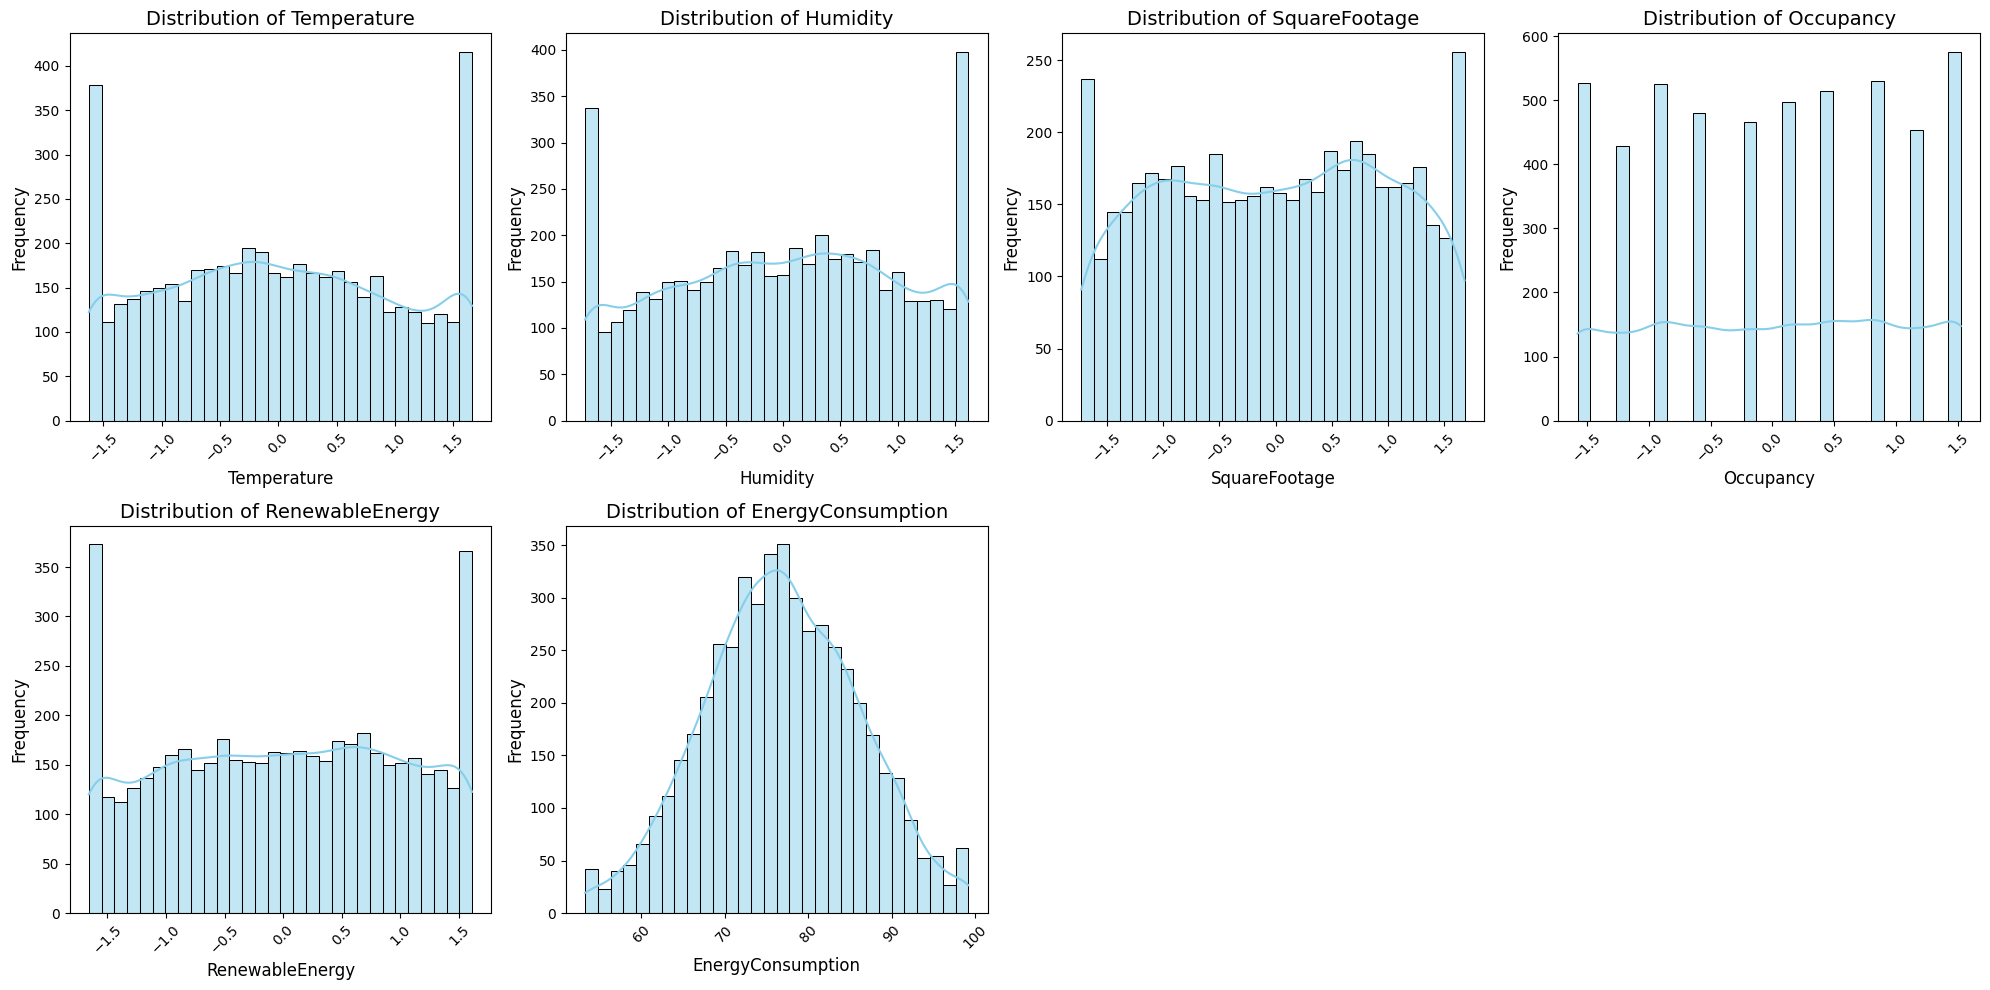

In [ ]:


# Dynamically calculate rows based on the number of numerical columns
num_plots = len(num_cols)
rows = (num_plots + 3) // 4  # Calculate rows for a 4-column layout

# Set up the figure
fig, axes = plt.subplots(rows, 4, figsize=(20, rows * 5))  # Adjust height dynamically
axes = axes.flatten()  # Flatten axes for easier iteration

# Create histograms for each numerical column
for index, col in enumerate(num_cols):
    sns.histplot(data=df, x=col, ax=axes[index], kde=True, color='skyblue', bins=30)  # Add KDE and bins
    axes[index].set_title(f'Distribution of {col}', fontsize=14)
    axes[index].set_xlabel(col, fontsize=12)
    axes[index].set_ylabel('Frequency', fontsize=12)
    axes[index].tick_params(axis='x', rotation=45)  # Rotate x-axis labels if needed

# Remove unused subplots if the number of numerical columns is less than the grid size
for i in range(len(num_cols), len(axes)):
    fig.delaxes(axes[i])  # Remove unused subplots

# Adjust layout and display
plt.tight_layout()
plt.show()


## Bar Plot

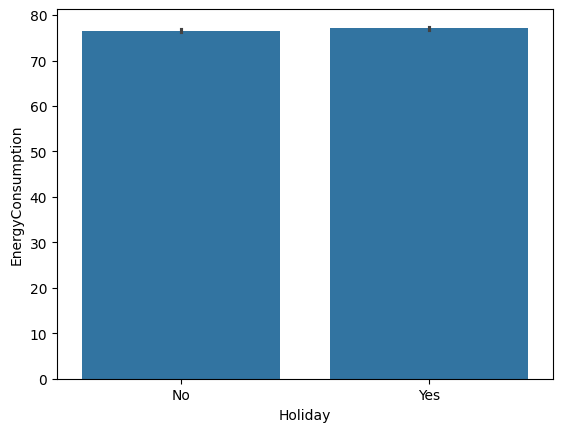

In [ ]:
sns.barplot(x='Holiday', y='EnergyConsumption', data=df)
plt.show()

## Line Plot

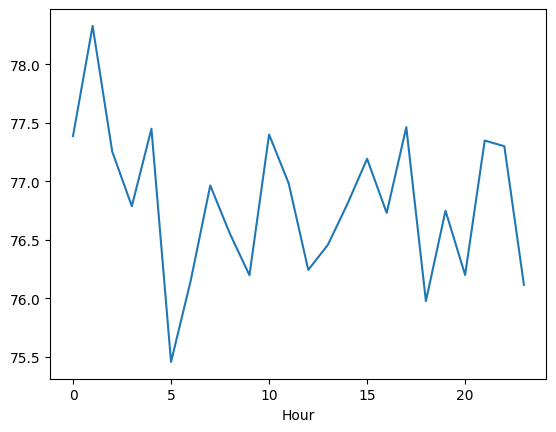

In [ ]:
df.groupby('Hour')['EnergyConsumption'].mean().plot(kind='line')
plt.show()

## **Boxplot**

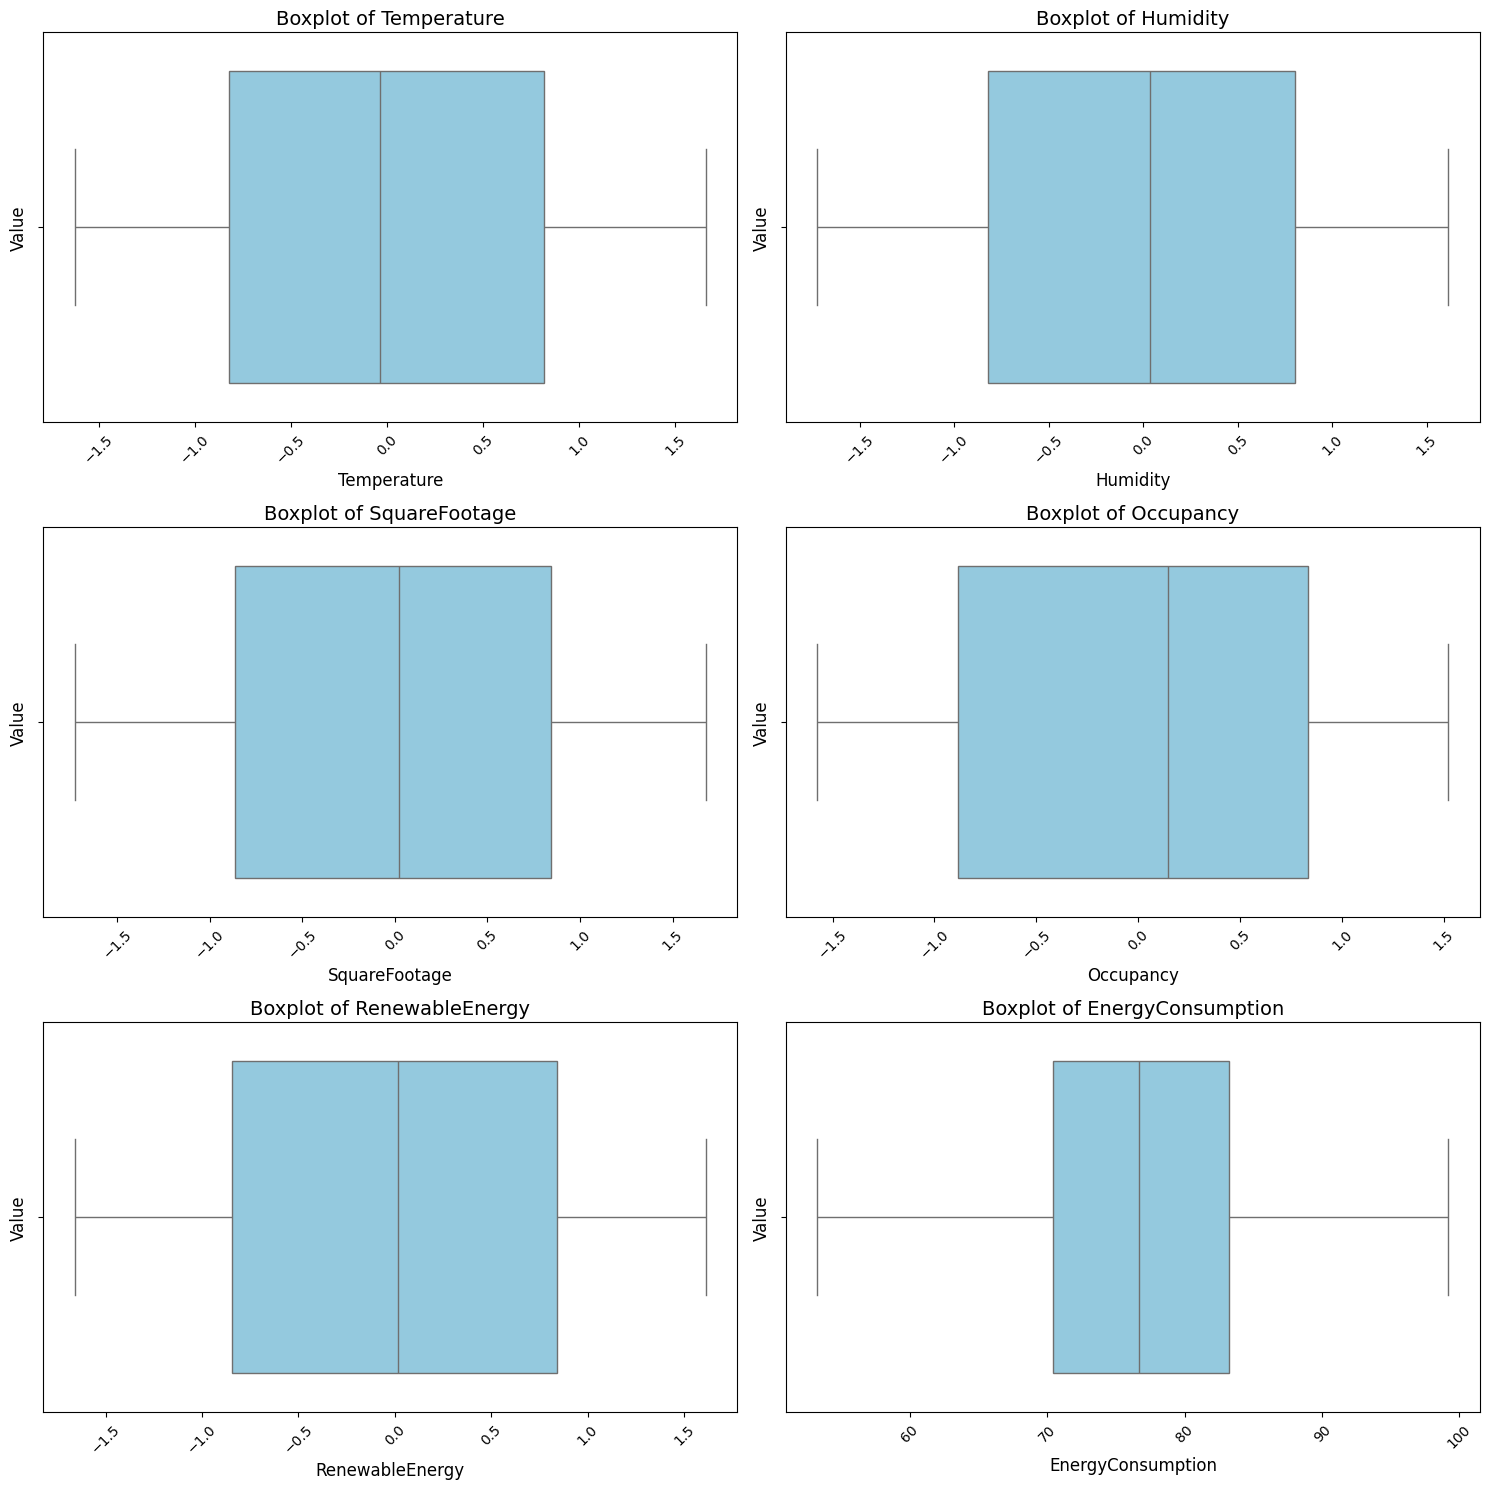

In [ ]:



# Dynamically calculate rows based on the number of numerical columns
num_plots = len(num_cols)
rows = (num_plots + 1) // 2  # Calculate rows for a 2-column layout

# Set up the figure
fig, axes = plt.subplots(rows, 2, figsize=(15, rows * 5))  # Adjust height dynamically
axes = axes.flatten()  # Flatten axes for easier iteration

# Create boxplots for each numerical column
for index, col in enumerate(num_cols):
    sns.boxplot(data=df, x=col, ax=axes[index], color='skyblue', fliersize=5)  # Customize outlier points
    axes[index].set_title(f'Boxplot of {col}', fontsize=14)
    axes[index].set_xlabel(col, fontsize=12)
    axes[index].set_ylabel('Value', fontsize=12)
    axes[index].tick_params(axis='x', rotation=45)  # Rotate x-axis labels for clarity

# Remove unused subplots if the number of numerical columns is odd
if num_plots % 2 != 0:
    fig.delaxes(axes[-1])  # Remove the last subplot if not needed

# Adjust layout and display
plt.tight_layout()
plt.show()


### # Interaction Between Features: HVACUsage and Temperature

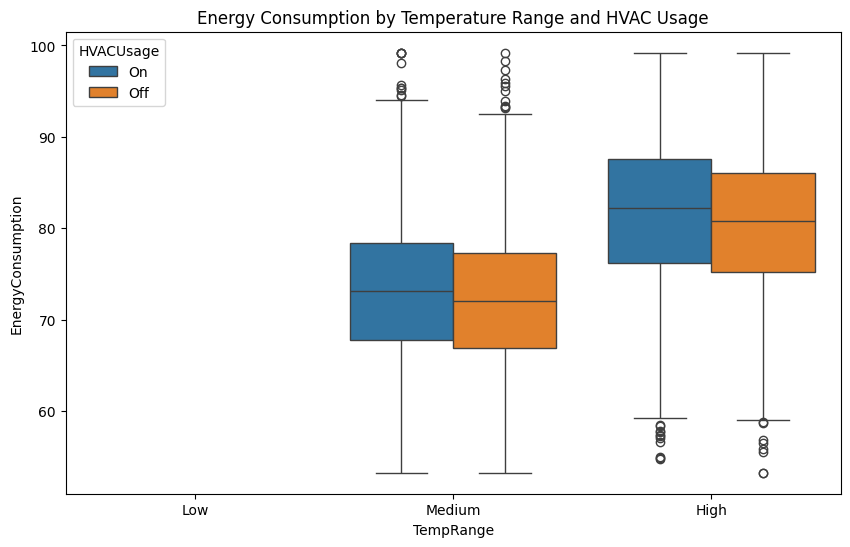

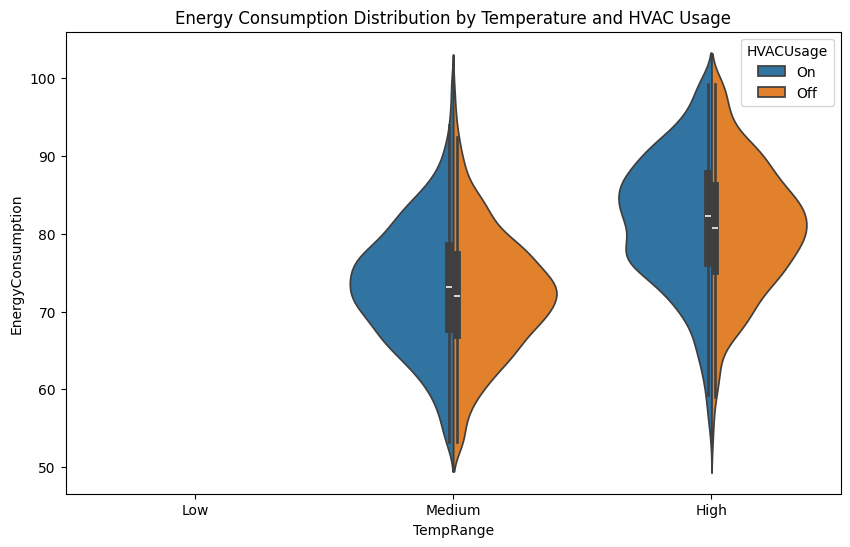

In [ ]:
# Interaction Between Features: HVACUsage and Temperature


# Create temperature bins
df['TempRange'] = pd.cut(df['Temperature'], bins=[0, 20, 25, 40], labels=['Low', 'Medium', 'High'])

# Boxplot: EnergyConsumption vs. TempRange grouped by HVACUsage
plt.figure(figsize=(10, 6))
sns.boxplot(x='TempRange', y='EnergyConsumption', hue='HVACUsage', data=df)
plt.title('Energy Consumption by Temperature Range and HVAC Usage')
plt.show()

# Violin plot alternative
plt.figure(figsize=(10, 6))
sns.violinplot(x='TempRange', y='EnergyConsumption', hue='HVACUsage', data=df, split=True)
plt.title('Energy Consumption Distribution by Temperature and HVAC Usage')
plt.show()


## **CountPlot**

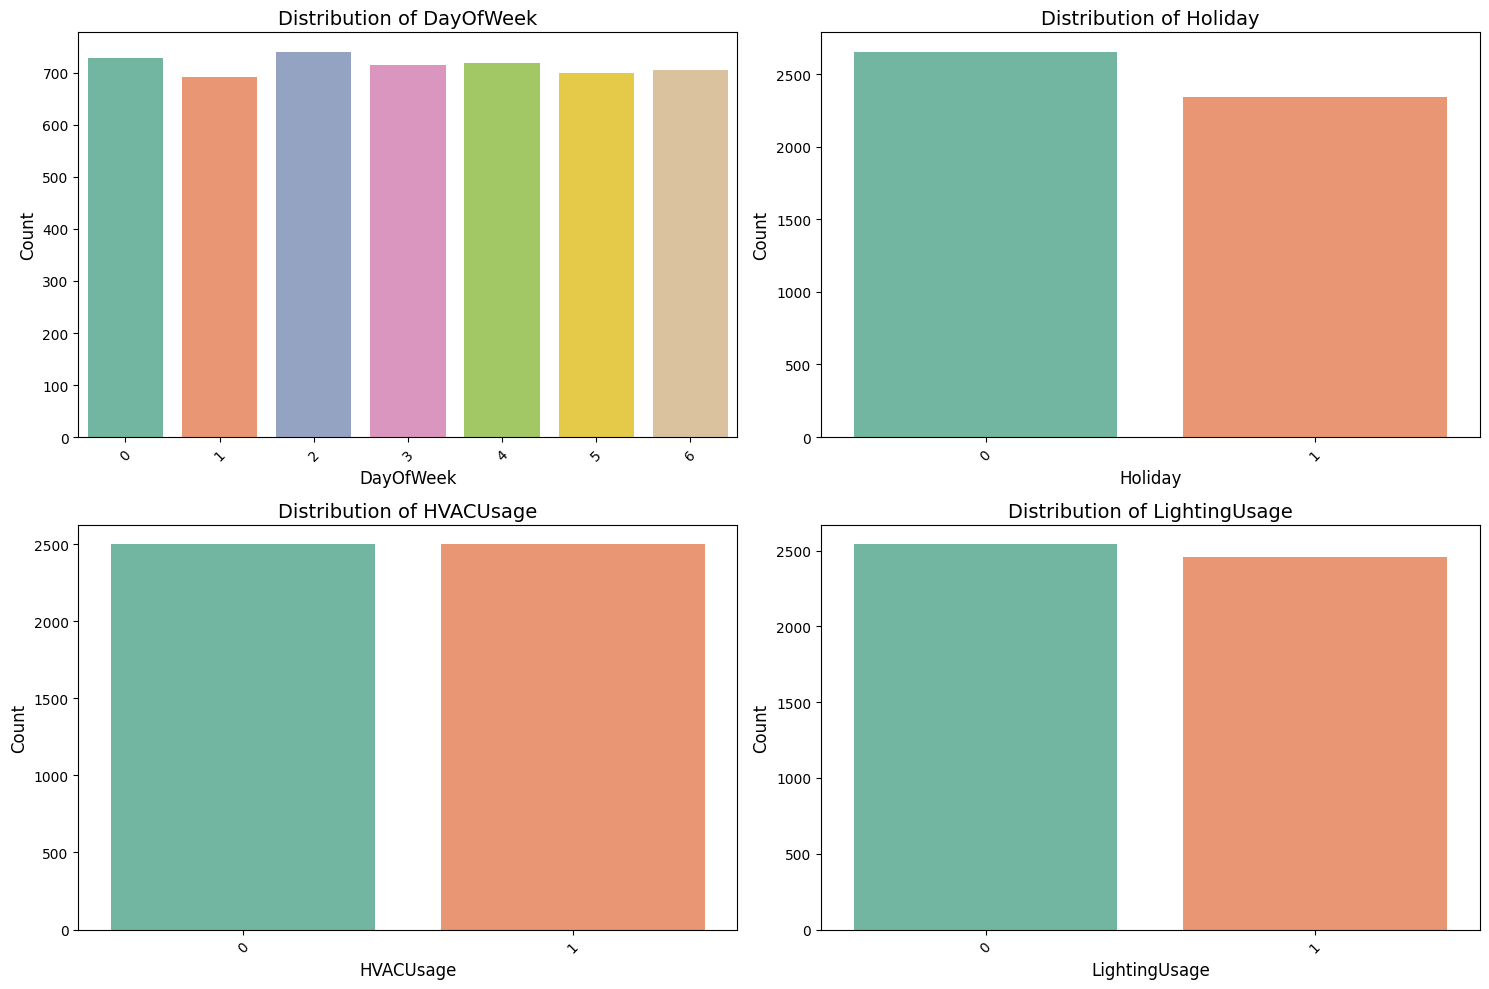

In [ ]:


# List of categorical columns (replace with your actual list)
cat_cols = ['DayOfWeek', 'Holiday', 'HVACUsage', 'LightingUsage']

# Create subplots dynamically based on the number of categorical columns
num_cols = len(cat_cols)
rows = (num_cols + 1) // 2  # Calculate rows for a 2-column layout

# Set up the figure
fig, axes = plt.subplots(rows, 2, figsize=(15, rows * 5))  # Adjust height dynamically
axes = axes.flatten()  # Flatten axes for easier iteration

# Plot countplots for each categorical column
for index, col in enumerate(cat_cols):
    sns.countplot(data=df, x=col, ax=axes[index], palette='Set2')
    axes[index].set_title(f'Distribution of {col}', fontsize=14)
    axes[index].set_xlabel(col, fontsize=12)
    axes[index].set_ylabel('Count', fontsize=12)
    axes[index].tick_params(axis='x', rotation=45)  # Rotate x-axis labels for clarity

# Remove unused subplots if the number of categorical columns is odd
if num_cols % 2 != 0:
    fig.delaxes(axes[-1])  # Remove the last subplot if not needed

# Adjust layout and display
plt.tight_layout()
plt.show()


## **Correlation**


Use a heatmap (sns.heatmap) to visualize correlations between numerical features and the target variable (EnergyConsumption).

Identify strong positive or negative correlations.

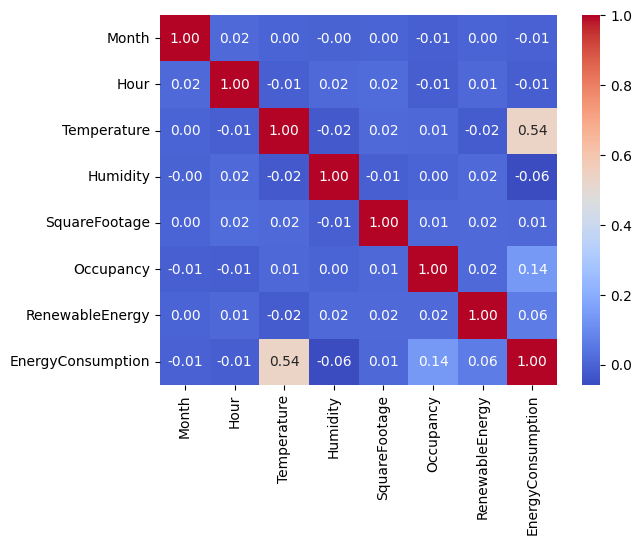

In [ ]:
sns.heatmap(df[num_cols].corr(),annot=True, cmap='coolwarm',fmt= '.2f')
plt.show()

Change our prediction to fit to Month and Hour.

Tempature is best corrlation

# Outlier Detection

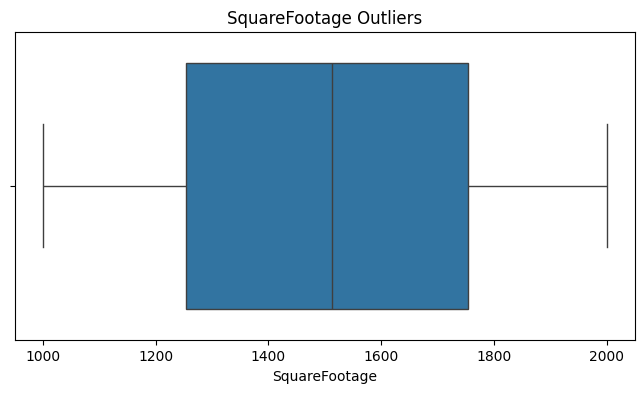

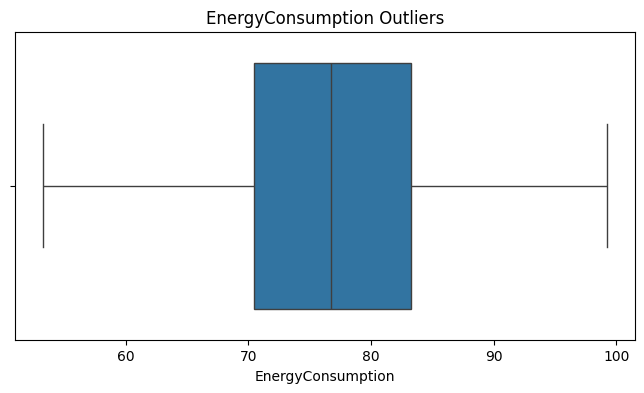

Number of outliers in EnergyConsumption: 0


In [ ]:
# Boxplot for SquareFootage
plt.figure(figsize=(8, 4))
sns.boxplot(x=df['SquareFootage'])
plt.title('SquareFootage Outliers')
plt.show()

# Boxplot for EnergyConsumption
plt.figure(figsize=(8, 4))
sns.boxplot(x=df['EnergyConsumption'])
plt.title('EnergyConsumption Outliers')
plt.show()

# Calculate IQR for EnergyConsumption
Q1 = df['EnergyConsumption'].quantile(0.25)
Q3 = df['EnergyConsumption'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df[(df['EnergyConsumption'] < lower_bound) | (df['EnergyConsumption'] > upper_bound)]
print(f"Number of outliers in EnergyConsumption: {len(outliers)}")


# Analyze Categorical Features
Frequency Counts:

Use .value_counts() to check the distribution of categorical variables like Holiday, DayOfWeek, HVACUsage, and LightingUsage.

In [ ]:
# Frequency counts for each categorical feature
print("Holiday Distribution:")
print(df['Holiday'].value_counts())
print("\nDayOfWeek Distribution:")
print(df['DayOfWeek'].value_counts())
print("\nHVACUsage Distribution:")
print(df['HVACUsage'].value_counts())
print("\nLightingUsage Distribution:")
print(df['LightingUsage'].value_counts())

Holiday Distribution:
Holiday
No     2656
Yes    2344
Name: count, dtype: int64

DayOfWeek Distribution:
DayOfWeek
Saturday     741
Friday       729
Thursday     719
Sunday       715
Wednesday    705
Tuesday      699
Monday       692
Name: count, dtype: int64

HVACUsage Distribution:
HVACUsage
On     2500
Off    2500
Name: count, dtype: int64

LightingUsage Distribution:
LightingUsage
Off    2543
On     2457
Name: count, dtype: int64


Insights:

- The dataset has a fairly balanced distribution between holidays and non-holidays, but there are slightly more non-holiday data points.

- This balance is good for modeling since both categories are well-represented, reducing the risk of bias in predictions.

- Saturday has the highest number of instances (741), while Monday has the lowest (692).

- The distribution across days is relatively uniform, which is beneficial for analyzing temporal patterns.

- Slight variations in counts could reflect real-world differences in energy consumption patterns (e.g., weekends vs. weekdays).

- HVAC usage (On) and non-usage (Off) are perfectly balanced, with 2500 instances each.

- Lighting systems are turned off (Off) slightly more often (2543 instances) than they are turned on (On) (2457 instances).

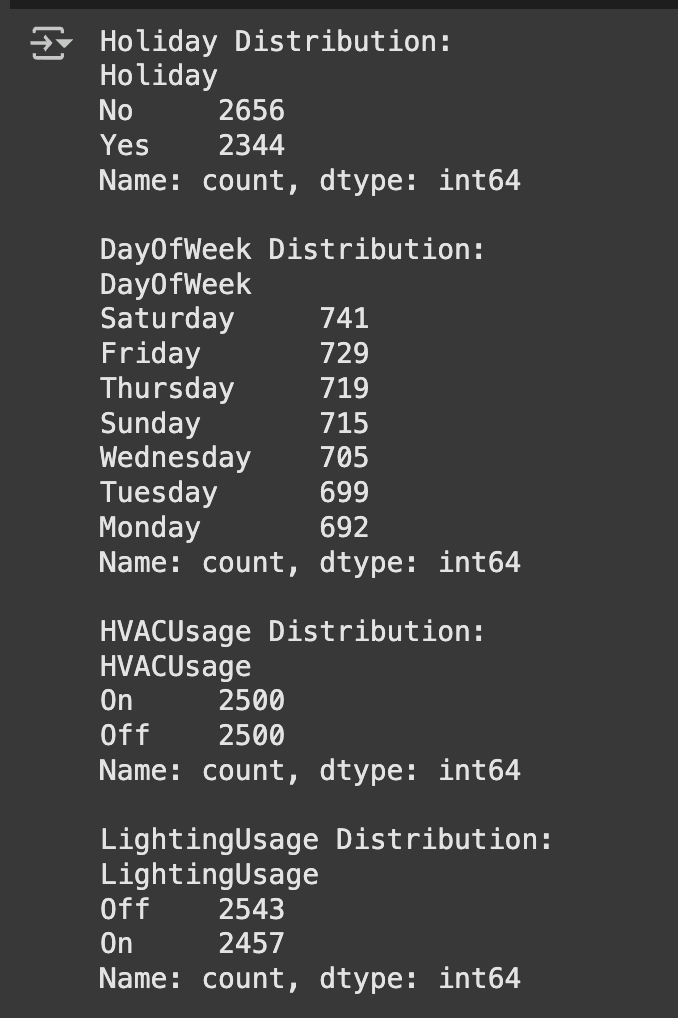

Holiday
No     76.549700
Yes    77.072778
Name: EnergyConsumption, dtype: float64


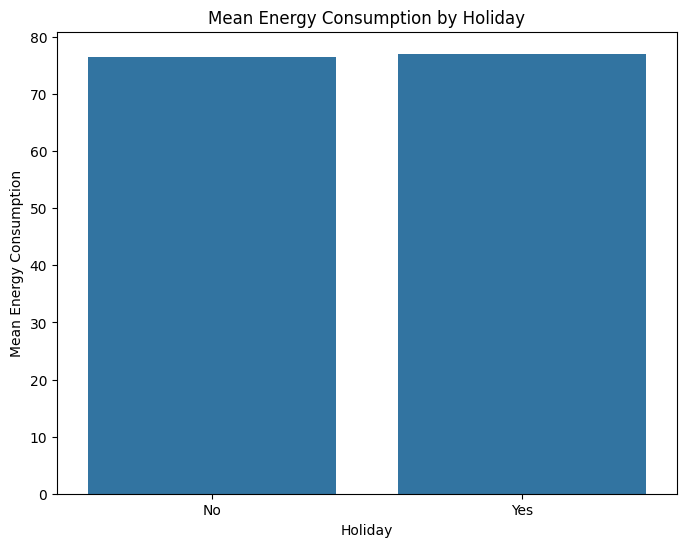

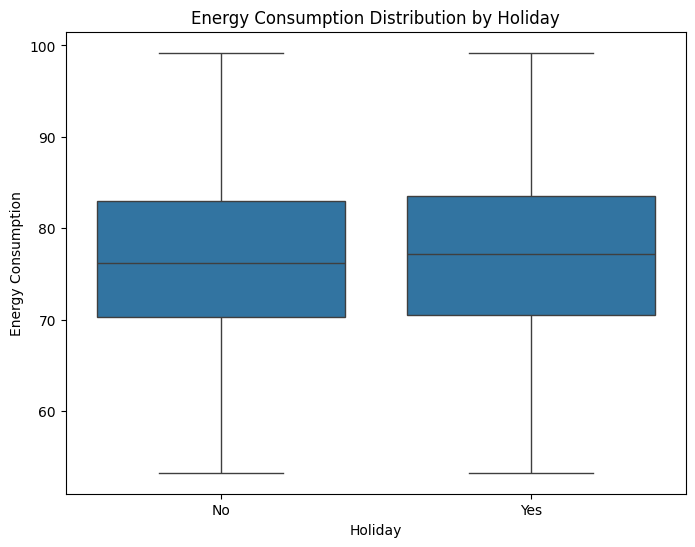

In [ ]:



# Calculate mean energy consumption by Holiday
holiday_mean = df.groupby('Holiday')['EnergyConsumption'].mean()
print(holiday_mean)

# Bar plot for mean energy consumption by Holiday
plt.figure(figsize=(8, 6))
sns.barplot(x='Holiday', y='EnergyConsumption', data=df, ci=None)
plt.title('Mean Energy Consumption by Holiday')
plt.ylabel('Mean Energy Consumption')
plt.show()

# Box plot for energy consumption distribution by Holiday
plt.figure(figsize=(8, 6))
sns.boxplot(x='Holiday', y='EnergyConsumption', data=df)
plt.title('Energy Consumption Distribution by Holiday')
plt.ylabel('Energy Consumption')
plt.show()


## **Changes in average energy consumption by Month**

In [ ]:
mas = df.groupby(['Month'])['EnergyConsumption'].mean().reset_index(name = 'Average EC')

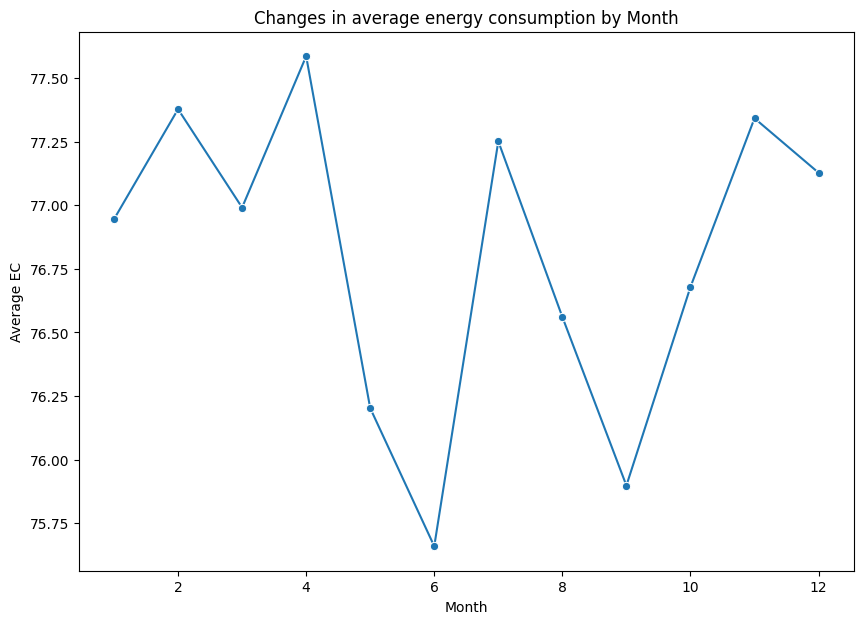

In [ ]:
plt.figure(figsize=(10,7))
sns.lineplot(mas, x = 'Month', y= 'Average EC', marker = 'o')
plt.title('Changes in average energy consumption by Month')
plt.show()

## **Changes in average energy consumption by Hour**

In [ ]:
mhs = df.groupby(['Hour'])['EnergyConsumption'].mean().reset_index(name = 'Average EC')

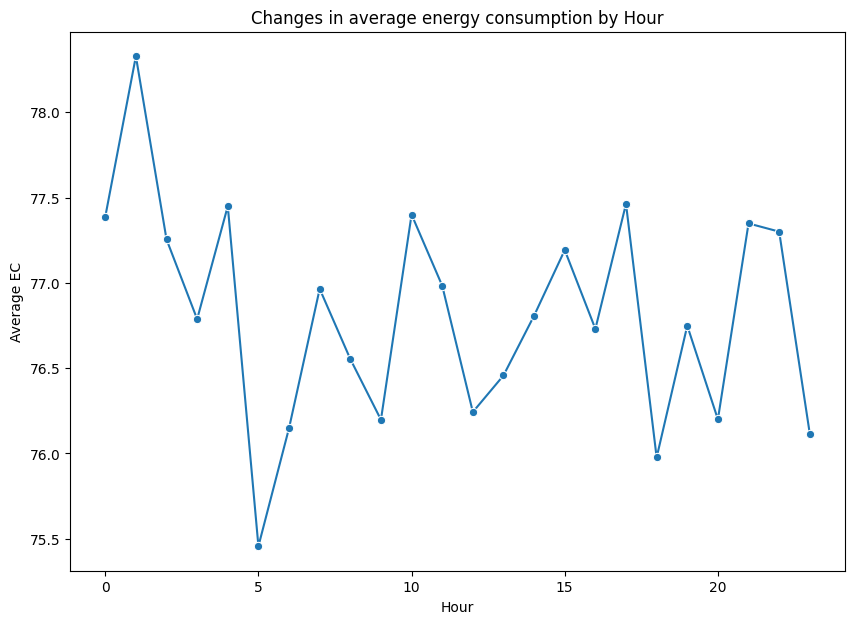

In [ ]:
plt.figure(figsize=(10,7))
sns.lineplot(mhs, x = 'Hour', y= 'Average EC', marker = 'o')

plt.title('Changes in average energy consumption by Hour')
plt.show()

## **Average energy consumption by day of the week**

In [ ]:
dowec = df.groupby(['DayOfWeek'])['EnergyConsumption'].mean().reset_index(name = 'Average EC')

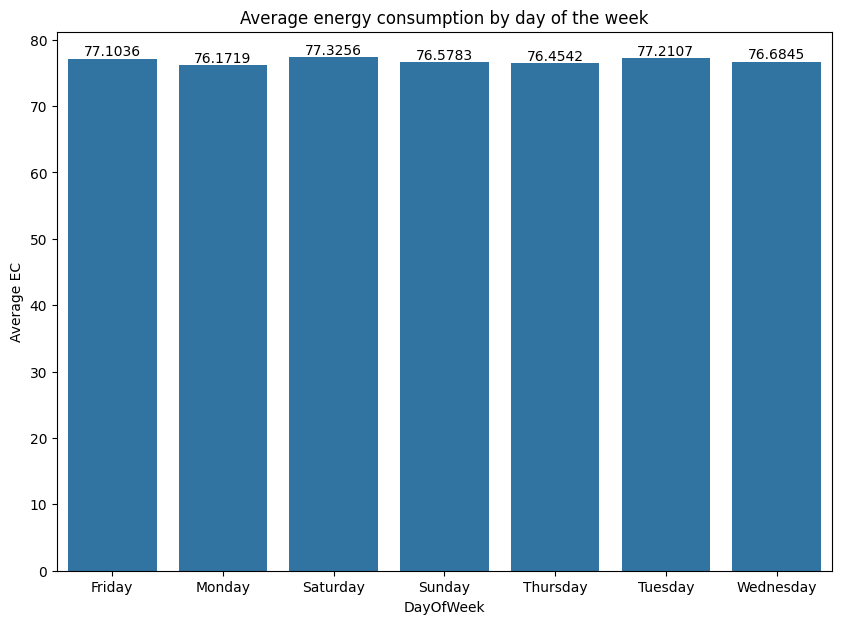

In [ ]:
plt.figure(figsize=(10,7))

ax = sns.barplot(data = dowec, x = 'DayOfWeek', y = 'Average EC')
ax.bar_label(ax.containers[0], fontsize=10)

plt.title('Average energy consumption by day of the week')
plt.show()

* **Energy consumption does not differ significantly by time zone, month, or day of the week.**
* **Energy consumption tends to increase when it is hot and cold.**

# **3. Modeling**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression , Ridge , Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler, LabelEncoder , OneHotEncoder

from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score , mean_absolute_error

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

from sklearn.svm import SVR

# 3. Data Preprocessing

### **StandardScaler**

In [ ]:
Scaler = StandardScaler()
num_cols = df.select_dtypes(include = ['int64', 'float64']).drop(columns=['EnergyConsumption']).columns

for col in num_cols:
    df[[col]] = Scaler.fit_transform(df[[col]])

### **LabelEncoder**

In [ ]:
label_encoder = LabelEncoder()
for col in cat_cols:
    df[col] = label_encoder.fit_transform(df[col])

## ColumnTransformer

In [ ]:
categorical_features = ['DayOfWeek', 'Holiday', 'HVACUsage', 'LightingUsage']
numerical_features = ['Month', 'Hour', 'Temperature', 'Humidity',
                     'SquareFootage', 'Occupancy', 'RenewableEnergy']

# Create preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(), categorical_features)])

### **Train Test Split**

In [ ]:
X = df.drop('EnergyConsumption', axis=1)
y = df['EnergyConsumption']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:


# Apply preprocessing
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

# 4. Model Training

### **ML**



In [ ]:
rfc = RandomForestRegressor()
gbc = GradientBoostingRegressor()
lnr = LinearRegression()
rid = Ridge(alpha=1.0)
las = Lasso(alpha=1.0)
xgb = XGBRegressor()

# models = [rfc, gbc, lnr, rid, las, xgb]

names = ["Random Forest", "Gradient Boosting",
         "Linear Regression","Ridge","Lasso", "XGBoost"]
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "XGBoost": XGBRegressor(n_estimators=100, learning_rate=0.1),
    "Support Vector": SVR(kernel='rbf'),
    "Gradient Boosting": gbc,
    "Ridge": rid,
    "Lasso": las
}

# 5. Evaluation and Reporting

Model Performance Comparison:
               Model        MSE      RMSE       MAE        R²
0  Linear Regression  60.982240  7.809113  6.157382  0.269366
1      Random Forest  63.332761  7.958188  6.327000  0.241204
2            XGBoost  64.411438  8.025674  6.374449  0.228280
3     Support Vector  62.097876  7.880221  6.179113  0.255999
4  Gradient Boosting  61.266325  7.827281  6.160898  0.265962
5              Ridge  60.980736  7.809016  6.157328  0.269384
6              Lasso  61.738354  7.857376  6.191901  0.260307


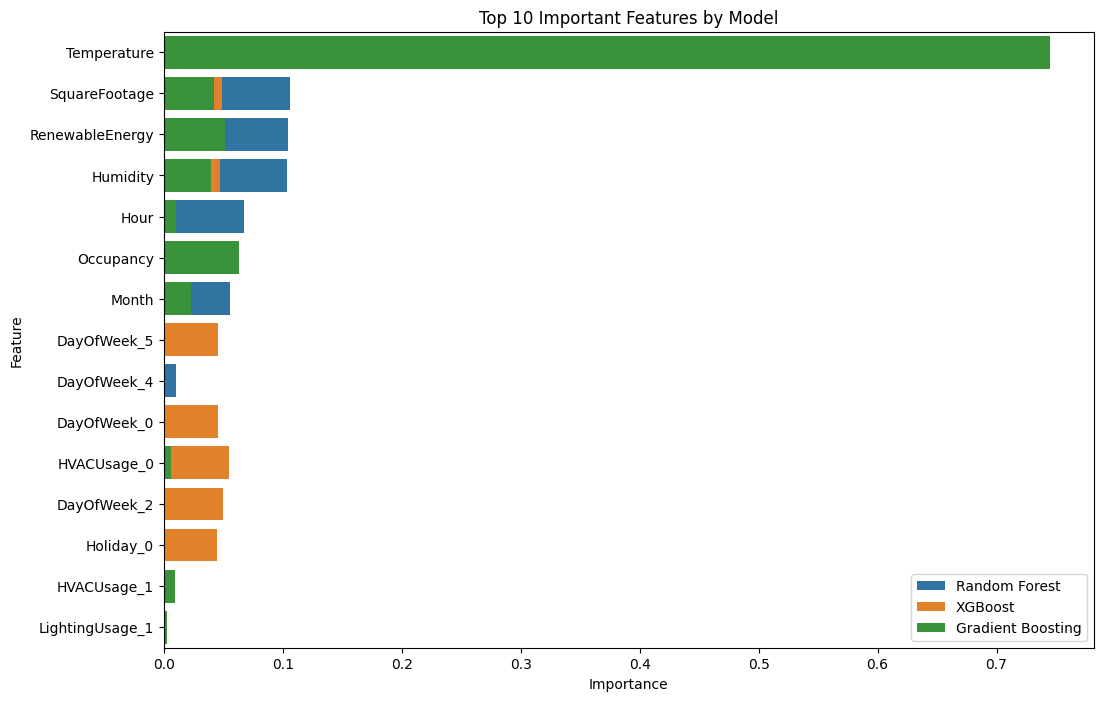

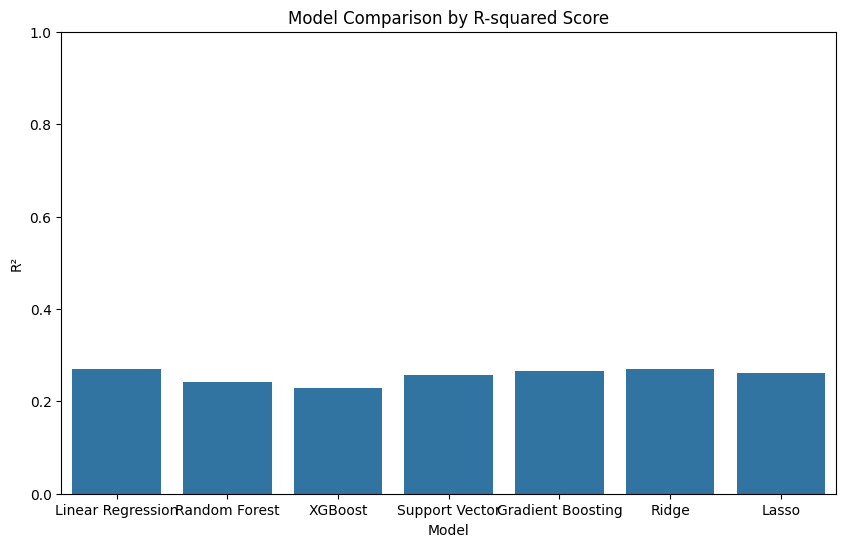

In [ ]:
# Evaluation framework
results = []
feature_importances = []

for name, model in (models.items()):
    # Train model
    model.fit(X_train, y_train)

    # Predictions
    y_pred = model.predict(X_test)

    # Calculate metrics
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Store results
    results.append({
        'Model': name,
        'MSE': mse,
        'RMSE': rmse,
        'MAE': mae,
        'R²': r2
    })

    # Store feature importances for tree-based models
    if hasattr(model, 'feature_importances_'):
        importances = model.feature_importances_
        feature_names = numerical_features + list(preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_features))
        feature_importances.append(pd.DataFrame({
            'Feature': feature_names,
            'Importance': importances,
            'Model': name
        }))

# Convert results to DataFrame
results_df = pd.DataFrame(results)

# Print results
print("Model Performance Comparison:")
print(results_df)

# Feature importance visualization
if feature_importances:
    fig, ax = plt.subplots(figsize=(12, 8))
    for fi in feature_importances:
        sns.barplot(x='Importance', y='Feature', data=fi.nlargest(10, 'Importance'), ax=ax, label=fi['Model'].iloc[0])
    plt.title('Top 10 Important Features by Model')
    plt.legend()
    plt.show()

# Model comparison visualization
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='R²', data=results_df)
plt.title('Model Comparison by R-squared Score')
plt.ylim(0, 1)
plt.show()

**If the R2 score is a negative value, it means that the data has been arbitrarily added or the model is bad.**

While the models confirm that features like Temperature and HVACUsage contribute to predictions (as seen in feature importance plots), their collective impact is weaker than expected. This suggests:

Nonlinear relationships may exist between features and energy consumption.

External factors not captured in the dataset (e.g., building insulation quality) might influence results.

Model Performance Comparison:
               Model        MSE      RMSE       MAE        R²
0  Linear Regression  60.982240  7.809113  6.157382  0.269366
1      Random Forest  63.332761  7.958188  6.327000  0.241204
2            XGBoost  64.411438  8.025674  6.374449  0.228280
3     Support Vector  62.097876  7.880221  6.179113  0.255999
4  Gradient Boosting  61.272954  7.827704  6.161322  0.265883
5              Ridge  60.980736  7.809016  6.157328  0.269384
6              Lasso  61.738354  7.857376  6.191901  0.260307


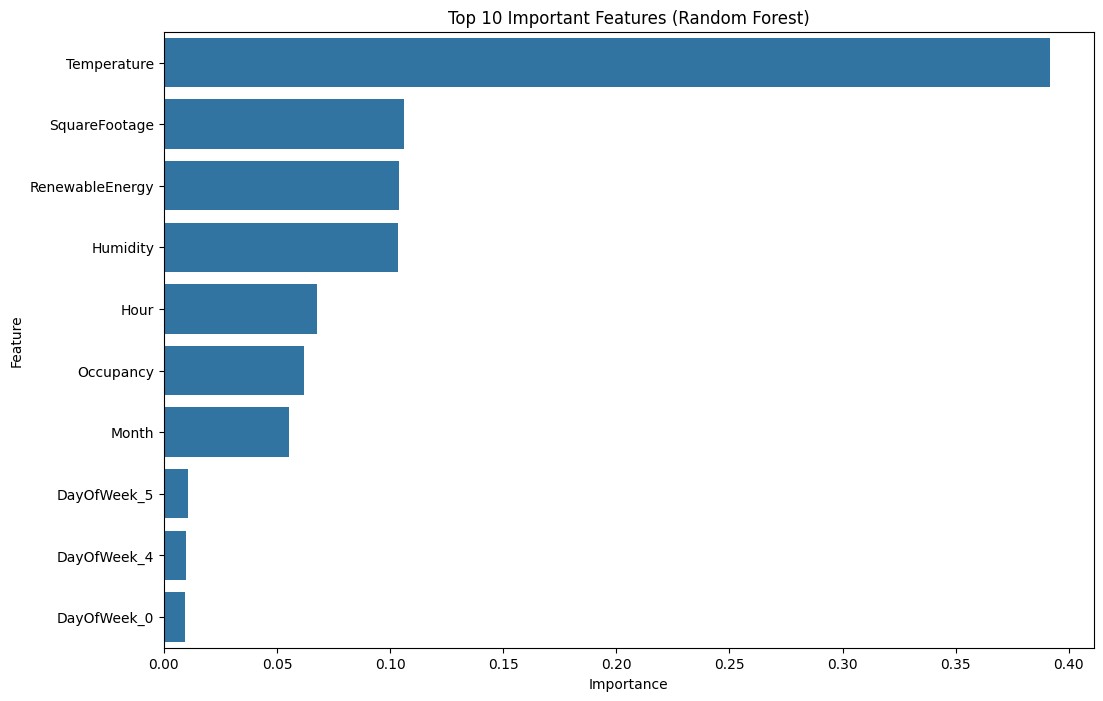

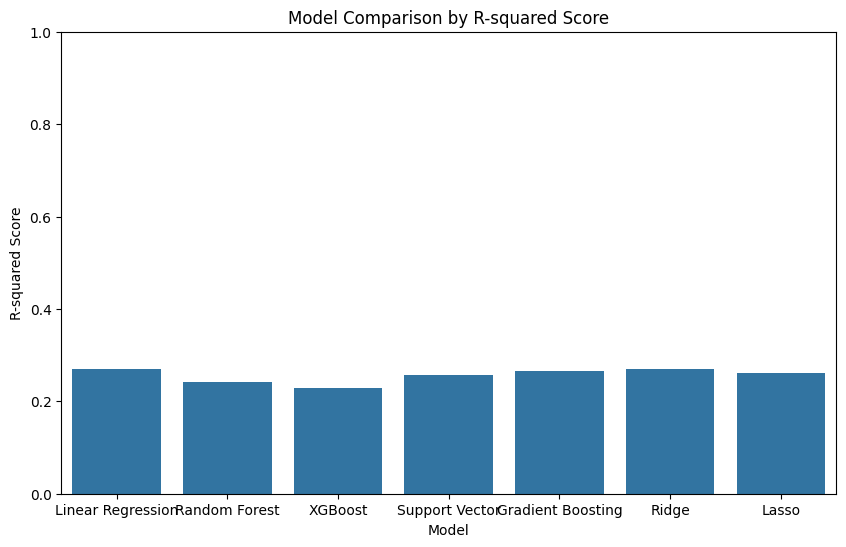

In [ ]:
# Evaluation framework
results = []
feature_importances = []

for name, model in models.items():
    # Train model
    model.fit(X_train, y_train)

    # Predictions
    y_pred = model.predict(X_test)

    # Calculate metrics
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Store results
    results.append({
        'Model': name,
        'MSE': mse,
        'RMSE': rmse,
        'MAE': mae,
        'R²': r2
    })

    # Store feature importances for tree-based models
    if hasattr(model, 'feature_importances_'):
        importances = model.feature_importances_
        feature_names = numerical_features + list(preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_features))
        feature_importances.append(pd.DataFrame({
            'Feature': feature_names,
            'Importance': importances,
            'Model': name
        }))

# Convert results to DataFrame
results_df = pd.DataFrame(results)

# Print results
print("Model Performance Comparison:")
print(results_df)

# Feature importance visualization for tree-based models (Random Forest/XGBoost/Gradient Boosting)
if feature_importances:
    fig, ax = plt.subplots(figsize=(12, 8))
    for fi in feature_importances:
        sns.barplot(x='Importance', y='Feature', data=fi.nlargest(10, 'Importance'), ax=ax)
        ax.set_title(f'Top 10 Important Features ({fi["Model"].iloc[0]})')
        plt.show()

# Model comparison visualization (R² scores)
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='R²', data=results_df)
plt.title('Model Comparison by R-squared Score')
plt.ylabel('R-squared Score')
plt.ylim(0, 1)
plt.show()

# Example Research Questions
Can machine learning models accurately predict hourly energy consumption in residential buildings?

Which features have the highest impact on energy consumption predictions?

How does renewable energy contribution affect overall energy usage?



## Extra

       RenewableEnergy  EnergyConsumption
count     5.000000e+03        5000.000000
mean      6.181722e-17          76.794919
std       1.000100e+00           9.231573
min      -1.659497e+00          53.263278
25%      -8.435086e-01          70.419588
50%       1.557819e-02          76.696267
75%       8.397445e-01          83.246274
max       1.612488e+00          99.201120


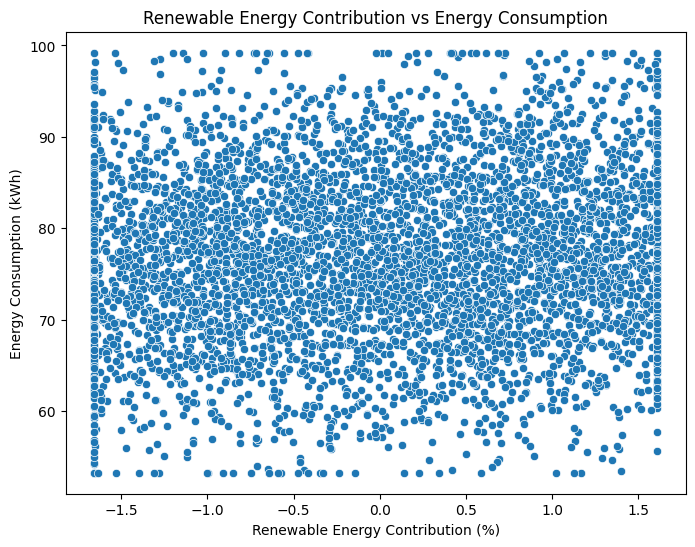

In [ ]:
# Inspect the relationship between RenewableEnergy and EnergyConsumption
print(df[['RenewableEnergy', 'EnergyConsumption']].describe())

# Scatter plot to visualize the relationship
plt.figure(figsize=(8, 6))
sns.scatterplot(x='RenewableEnergy', y='EnergyConsumption', data=df)
plt.title('Renewable Energy Contribution vs Energy Consumption')
plt.xlabel('Renewable Energy Contribution (%)')
plt.ylabel('Energy Consumption (kWh)')
plt.show()



In [ ]:
# Train a simple regression model to quantify the impact
X = df[['RenewableEnergy']]  # Feature: Renewable Energy Contribution
y = df['EnergyConsumption']  # Target: Energy Consumption

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)

# Evaluate model performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Model Performance:')
print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'R-squared (R²): {r2:.2f}')



Model Performance:
Mean Squared Error (MSE): 82.98
R-squared (R²): 0.01


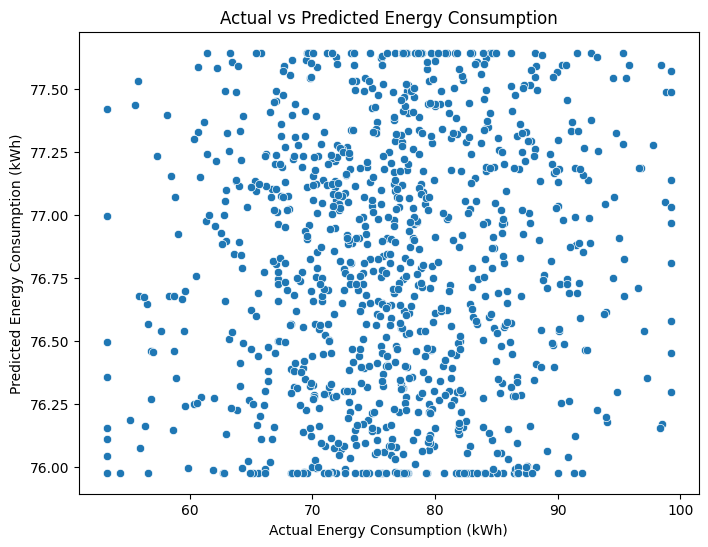

In [ ]:
#  Visualize predictions vs actual values
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.title('Actual vs Predicted Energy Consumption')
plt.xlabel('Actual Energy Consumption (kWh)')
plt.ylabel('Predicted Energy Consumption (kWh)')
plt.show()